# Survival Analysis

Survival Analysis is the analysis of any 'time to event' response variable. A 'time to event' variable reflects the the waiting time until the occurence of a well-defined event. This time is often referred to as a failure time, survival time, or event time. For example,
* Time until a machine fails
* Time until brake failure
* Time until tumor recurrence

Typical problem statements in survival analysis are:
* Probability of patient survival for the next 2 years
* Difference in survival between groups (say between trial drug and placebo/standard drug) 


Time to event variables have a set of unique features. 

1. Times to event are always positive.
2. They are usually continous and their distributions are often skewed. For example, in a study assessing time to recurrence in patients, the majority of events may occur early in the follow up with very few occurring later. On the other hand, in a study of time to death, the majority of events (deaths) may occur later in the follow up. 
3. Standard statistical procedures that assume normality of distributions do not apply. Nonparametric procedures could be invoked except for the fact that there are additional issues. Specifically, complete data (actual time to event data) is not always available on each participant in a study. In many studies, participants are enrolled over a period of time (months or years) and the study ends on a specific calendar date. Thus, participants who enroll later are followed for a shorter period than participants who enroll early. 
4. Some participants may drop out of the study before the end of the follow-up period. For some units the event of interest has not occurred at the time the data are analyzed. In these cases, we have incomplete information. The actual survival time is not known because the study ends or because a participant drops out of the study before experiencing the event. For these cases, the data we have is that the participants survival time is greater than their last observed follow-up time. The times recorded for incomplete cases are called censored times.


## Censoring

As discussed above, censoring implies that we have some information about a subject’s event time, but the exact event time is unknown. Censoring should be random for survival analysis to be valid. There are many types of censoring, most common being right censoring. 
The three most common reasons for right censoring are:
* Even does not occur before the study ends: Example, say study is to run different cars for 200,000 miles and see when they breakdown. The study is designed to end exactly at 200,000 miles. If a car does not breakdown by then, it is a censored data.
* Subject withdraws from the study: Most weight loss studies face this issue due to subject dropping out.
* Subject dies before study ends (where death is not the event in the study)

Right censoring is further classified into Type I and Type II censoring. 

* In the above car breakdown example, instead of 200,000 miles, consider a study for driving cars and designed to end after time C. Any subject who does not have an event(car breakdown) observed within this time is censored. This is Type I censoring.
* Consider a study where 100 cars are driven and the study is designed to end after 30 flat tires, that is, the study ends when there is a pre-specified number of events. This is Type II censoring.

The below image depicts censoring in a study with 8 subjects.

<img src="../images/censoring.png" style="width: 700px;">


### Exercise

Consider a factory of machine parts. Stress testing is conducted on these parts and a study is designed for time to failure of the parts. 1000 parts are sampled at random, and the study is designed to stop after 2 weeks. What is the censoring type. Assign 'Type I' or 'Type II' to the variable cens.

In [ ]:
#cens = ''

Refer to above discussion

In [ ]:
cens='Type I'

In [ ]:
try:
    if cens == 'Type I':
        ref_assert_var = True
        print('continue')
    else:
        ref_assert_var = False
        print('Please follow the instructions given and use the same variables provided in the instructions. ')
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions. ')

## Hazard and Survival Function

Let T denote the continous non-negative random variable that represents the time to event response variable. T has the probability density function (pdf), f(t) and cumulative distribution function (cdf), F(t) = Pr{T <= t}. This gives the probability that the event has occurred by duration t. The survival function is derived as shown below.
S(t) = Pr(T > t) = 1 − Pr(T <= t) = 1 - F(t).

The survival function gives the probability that a subject will survive past time t. The survival function has the following properties:
* As t ranges from 0 to $\infty$, S(t) is non-increasing
* At time t = 0, S(t) = 1 => the probability of surviving past time 0 is 1. 
* At time t = $\infty$, S(t) = 0 => as time goes to $\infty$, the survival function tends to 0.

The hazard function, h(t), is an alternative characteristic of the districution of T. It is the instantaneous rate at which events occur, given there were no previous events.

$h(t) = \left\{\frac{f(t)}{S(t)}\right\}$


H(t) is the cumulative hazard function which describes the accumulated risk up to time t. If any of the functions F(t), S(t), H(t), or h(t) is known, we can derive the other functions.

The below image shows the survival and hazard functions for two drugs where the event is death. It is clear from the survival function that the performance of Drug A is better because the survival probability is higher than that of Drug B at all times $t$.

<img src="../images/survival-hazard.png" style="width: 900px;">


### Estimating $S(t)$ and $H(t)$

We can use both parametric and non-parametric methods to estimate the survival function. We would have to assume that every subject follows the same survival function. When there is no censoring, a non-parametric estimator or $S(t)$ is $1-F_n(t)$, where $F_n(t)$ is the empirical cumulative distribution function of the response variable $T$. In case of censoring, we can estimate $S(t)$ using the Kaplan-Meier product-limit estimator. By making further assumptions and by specifying a parametric form for $S(t)$, we can estimate the expected failure times and derive smooth functions for estimating $S(t)$ and $H(t)$. Weibull, exponential, log-normal and log-logistic are some of the popular distributions used for estimating survival functions.

The Kaplan-Meier estimator estimates the survival function using the following product:

$\hat{S}\;(t)= \displaystyle\prod_{t_i < t} \frac {n_i−d_i}{n_i}$
where $d_i$ are the number of events at time $t$ and $n_i$ is the number of subjects at risk of event just prior to time $t$.


### Exercise

Let us now look at the marriage dissolution in US dataset. The dataset has 3771 couples where the unit of observation is the couple and the event of interest is divorce, with interview and widowhood treated as censoring events. We have two fixed covariates: education of the husband and one indicator of the couple's ethnicity: whether the couple is mixed. The variables are:

id: a couple number.
heduc: education of the husband, coded
0 = less than 12 years,
1 = 12 to 15 years, and
2 = 16 or more years.
mixed: coded 1 if the husband and wife have different ethnicity (defined as black or other), 0 otherwise.
years: duration of marriage, from the date of wedding to divorce or censoring (due to widowhood or interview).
div: the failure indicator, coded 1 for divorce and 0 for censoring.

Dataset souce: http://data.princeton.edu/wws509/datasets/#divorce

The lifelines library can be used to estimate survival function. Use the following code to read in the data and plot the survival function using the Kaplan-Meier estimator.

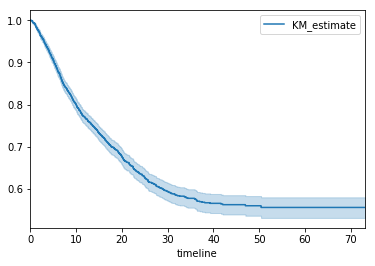

In [7]:
%matplotlib inline

import pandas as pd
from lifelines import KaplanMeierFitter

div_df = pd.read_csv("../data/divorce.csv", header=None)
columns = ['ID', 'HEduc', 'Mixed', 'Years','Div']
div_df.columns = columns

kmf = KaplanMeierFitter()
kmf.fit(durations = div_df.Years, 
        event_observed = div_df.Div)
kmf.plot()

In [6]:
try:
    a=1
    if a == 1:
        ref_assert_var = True
        print('continue')
    else:
        ref_assert_var = False
        print('Please follow the instructions given and use the same variables provided in the instructions. ')
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions. ')

continue
